In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [2]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [3]:
dfp = pd.read_csv(r'\Paper.csv.zip')

In [4]:
dfp.columns = ['PaperID', 'Year', 'C5', 'Citation_Count', 'hit', 'Reference_Count',
       'Team_Size', 'Institution_Count', 'Country_Count', 'Title_Length',
       'Atyp_10pct_Z', 'Novelty_percentile', 'Disruption',
       'Disruption_percentile', 'RaoStirling', 'NIH_Count', 'NSF_Count',
       'Patent_Count', 'Newsfeed_Count', 'Tweet_Count', 'NCT_Count',
       'TeamAgeDiversity', 'Team_Diversity_Gini', 'TeamAgeMean', 'TeamAgeMax',
       'TeamAgeMin', 'Reference_Age_Mean', 'Reference_Age_Std', 'FieldID',
       'FieldName', 'FieldID2', 'FieldName2', 'JournalID']

In [5]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
dfp = dfp[dfp['FieldName'].isin(Flst)]

In [6]:
dfp = dfp[dfp['TeamAgeMean']<60].copy()
dfp.index = range(len(dfp))

# Draw Fig. 1 a-c for 16 fields

In [7]:
colors = sns.color_palette("mako", 16)

In [8]:
%%time
x = range(1950 , 2017)
c = 'TeamAgeMean'
y = dfp.groupby('Year')[c].mean().reset_index()[c].values
ylst = [dfp[dfp['FieldName']==F].groupby('Year')[c].mean().reset_index()[c].values for F in Flst]

CPU times: total: 19.9 s
Wall time: 20 s


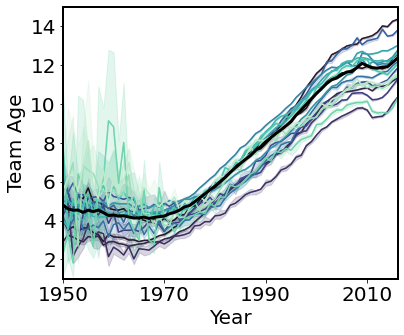

In [27]:
f, ax = plt.subplots(figsize=(6, 5))
for i in range(len(ylst)):
    plt.plot(x, ylst[i],linewidth=1,alpha = .4,c=colors[i])
    sns.lineplot(dfp[dfp['FieldName']==Flst[i]],x='Year',y=c,color=colors[i],n_boot=10)

plt.plot(x, y,linewidth=3,alpha = 1,c='black')
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Age',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(1,15)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(savepath+"a.svg",bbox_inches = 'tight')

In [34]:
x = range(1950 , 2017)
c2 = 'TeamAgeDiversity'
y2 = dfp.groupby('Year')[c2].mean().reset_index()[c2].values
ylst2 = [dfp[dfp['FieldName']==F].groupby('Year')[c2].mean().reset_index()[c2].values for F in Flst]

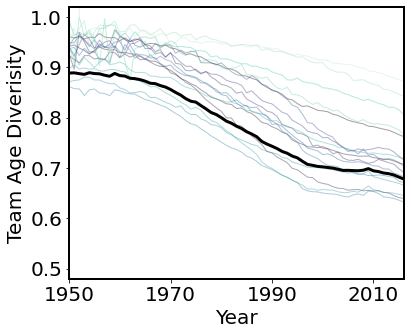

In [35]:
f, ax = plt.subplots(figsize=(6, 5))

for i in range(len(ylst2)):
    plt.plot(x, ylst2[i],linewidth=1,alpha = .4,c=colors[i])
    sns.lineplot(dfp[dfp['FieldName']==Flst[i]],x='Year',y=c,color=colors[i],n_boot=10)
plt.plot(x, y2,linewidth=3,alpha = 1,c='black')
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Age Diverisity',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(0.48,1.02)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig 1\b.svg",bbox_inches = 'tight')

In [29]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c].mean())  
d2 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c2].mean())
d1 = d1.loc[Flst,:]
d2 = d2.loc[Flst,:]

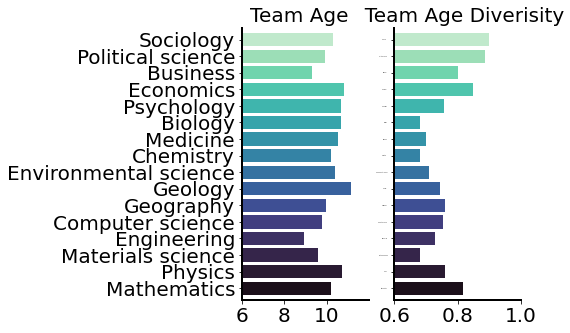

In [37]:
plt.subplots(1,2,figsize=(5,5))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0)
ax = plt.subplot(1,2, 1)
plt.barh( d1.index ,  width=d1.values.flatten(), capsize = 3, color = colors)
plt.xlim(6,12)
plt.ylim(-.7,15.7)
plt.yticks(fontsize=20,)
plt.xticks([6,8,10],fontsize=20,)
plt.title('Team Age  ',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax = plt.subplot(1,2, 2)
plt.barh( d2.index ,  width=d2.values.flatten(), capsize = 3, color = colors)
plt.xlim(0.6,1)
plt.ylim(-.7,15.7)
plt.yticks(fontsize=0,)
plt.xticks([.6,.8,1],fontsize=20,)
plt.title('  Team Age Diverisity',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig 1\c.svg",bbox_inches = 'tight')

# # Draw Fig. 1 d-e for different team sizes

In [14]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [15]:
colors2 = sns.color_palette("rocket", 9)

In [16]:
x = range(1950 , 2017)
c = 'TeamAgeMean'
ylst3 = [dfp[dfp['TeamSizeG']==G].groupby('Year')[c].mean().reset_index()[c].values for G in range(1,10)]

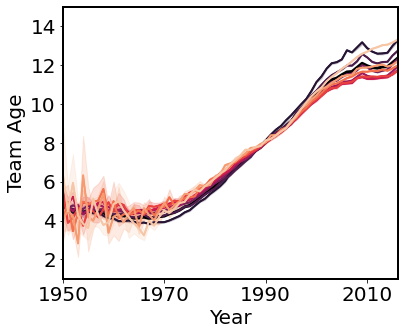

In [23]:
f, ax = plt.subplots(figsize=(6, 5))
plt.plot(x, y,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst3)):
    plt.plot(x, ylst3[i],linewidth=2,alpha = 1,c=colors2[i])
    sns.lineplot(dfp[dfp['TeamSizeG']==i+1],x='Year',y=c,color=colors2[i],n_boot=10)
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Age',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(1,15)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig 1\e.svg",bbox_inches = 'tight')

In [18]:
x = range(1950 , 2017)
c2 = 'TeamAgeDiversity'
ylst4 = [dfp[dfp['TeamSizeG']==G].groupby('Year')[c2].mean().reset_index()[c2].values for G in range(1,10)]

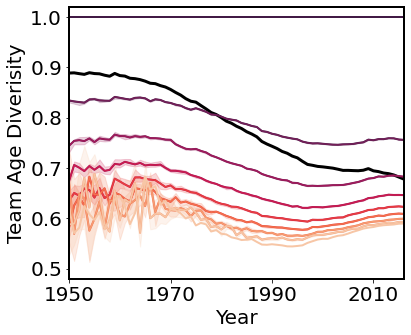

In [24]:
f, ax = plt.subplots(figsize=(6, 5))
plt.plot(x, y2,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst4)):
    plt.plot(x, ylst4[i],linewidth=2,alpha = 1,c=colors2[i])
    sns.lineplot(dfp[dfp['TeamSizeG']==i],x='Year',y=c2,color=colors2[i],n_boot=10)
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Age Diverisity',fontsize = 20)
plt.ylim(0.48,1.02)
plt.xlim(1950,2016)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig 1\f.svg",bbox_inches = 'tight')

In [31]:
d11 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c].mean())  
d21 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c2].mean())

In [32]:
d11.index = ['Team Size = 1','Team Size = 2','Team Size = 3','Team Size = 4','Team Size = 5','Team Size = 6','Team Size = 7','Team Size = 8','Team Size > 8']
d21.index = ['Team Size = 1','Team Size = 2','Team Size = 3','Team Size = 4','Team Size = 5','Team Size = 6','Team Size = 7','Team Size = 8','Team Size > 8']

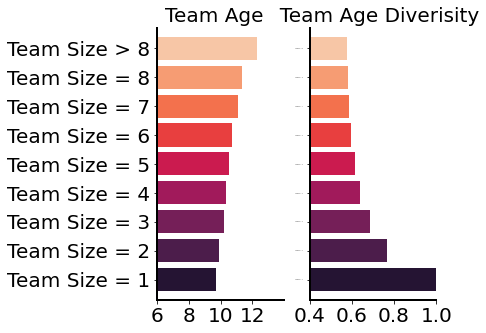

In [38]:
plt.subplots(1,2,figsize=(5,5))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0)
ax = plt.subplot(1,2, 1)
plt.barh( d11.index ,  width=d11.values.flatten(), capsize = 3, color = colors2)
plt.xlim(6,14)
plt.ylim(-.7,8.7)
plt.yticks(fontsize=20,)
plt.xticks([6,8,10,12],fontsize=20,)
plt.title('Team Age  ',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax = plt.subplot(1,2, 2)
plt.barh( d21.index ,  width=d21.values.flatten(), capsize = 3, color = colors2)
plt.xlim(0.6,1)
plt.ylim(-.7,8.7)
plt.yticks(fontsize=0,)
plt.xticks([.4,.6,.8,1],fontsize=20,)
plt.title('  Team Age Diverisity',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig 1\g.svg",bbox_inches = 'tight')

# Draw Fig. S2 a-c for 16 fields

In [35]:
colors = sns.color_palette("mako", 16)

In [36]:
dfp.columns

Index(['PaperID', 'Year', 'Reference_Count', 'Citation_Count', 'C10', 'C5',
       'hit', 'PFemale', 'Atyp_10pct_Z', 'Atyp_Median_Z', 'Novelty10pct',
       'Atyp_Pairs', 'Disruption', 'Team_Size', 'Institution_Count',
       'Country_Count', 'NIH_Count', 'NSF_Count', 'Title_Length', 'Page_Count',
       'SB_B', 'SB_T', 'Newsfeed_Count', 'Tweet_Count', 'NCT_Count',
       'Patent_Count', 'Patent_Count_2O', 'WSB_mu', 'WSB_sigma', 'WSB_Cinf',
       'RefAgeMean', 'RefAgeDiversity', 'TeamAgeMean', 'TeamAgeDiversity',
       'AvgPastPubs', 'TeamMaxAge', 'TeamMinAge', 'JournalID', 'FieldID',
       'FieldID2', 'FieldName', 'TeamSizeG'],
      dtype='object')

In [37]:
%%time
x = range(1950 , 2017)
c = 'TeamMaxAge'
y = dfp.groupby('Year')[c].mean().reset_index()[c].values
ylst = [dfp[dfp['FieldName']==F].groupby('Year')[c].mean().reset_index()[c].values for F in Flst]

CPU times: total: 23.4 s
Wall time: 23.5 s


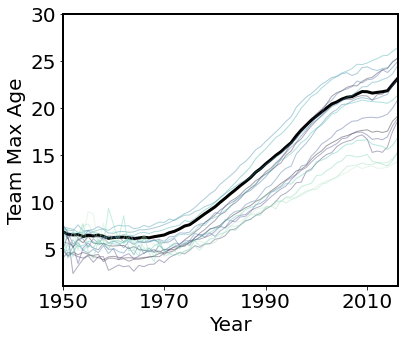

In [38]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Year',y=c,color='grey',n_boot=30)
plt.plot(x, y,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(x, ylst[i],linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Max Age',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(1,30)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\a.svg",bbox_inches = 'tight')

In [39]:
x = range(1950 , 2017)
c2 = 'TeamMinAge'
y2 = dfp.groupby('Year')[c2].mean().reset_index()[c2].values
ylst2 = [dfp[dfp['FieldName']==F].groupby('Year')[c2].mean().reset_index()[c2].values for F in Flst]

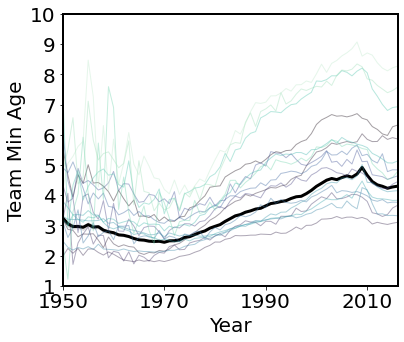

In [40]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Year',y=c2,color='grey',n_boot=30)
plt.plot(x, y2,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst2)):
    plt.plot(x, ylst2[i],linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Min Age',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(1,10)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\b.svg",bbox_inches = 'tight')

In [41]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c].mean())  
d2 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c2].mean())
d1 = d1.loc[Flst,:]
d2 = d2.loc[Flst,:]

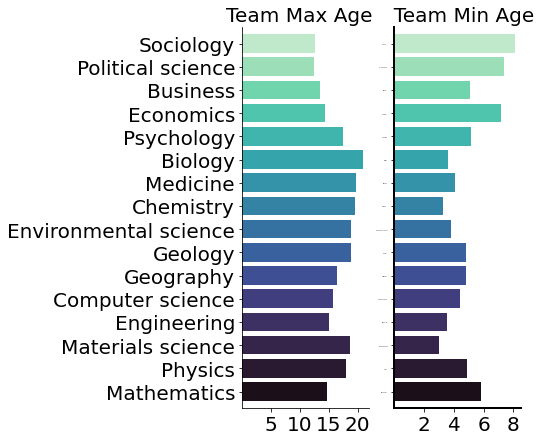

In [42]:
plt.subplots(1,2,figsize=(5,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0)
ax = plt.subplot(1,2, 1)
plt.barh( d1.index ,  width=d1.values.flatten(), capsize = 3, color = colors)
plt.ylim(-.7,15.7)
plt.yticks(fontsize=20,)
plt.xticks([5,10,15,20],fontsize=20,)
plt.title('Team Max Age  ',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,2, 2)
plt.barh( d2.index ,  width=d2.values.flatten(), capsize = 3, color = colors)
plt.ylim(-.7,15.7)
plt.yticks(fontsize=0,)
plt.xticks([2,4,6,8],fontsize=20,)
plt.title('  Team Min Age',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\c.svg",bbox_inches = 'tight')

# # Draw Fig. 1 d-e for different team sizes

In [43]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [44]:
colors2 = sns.color_palette("rocket", 9)

In [45]:
x = range(1950 , 2017)
c = 'TeamMaxAge'
ylst3 = [dfp[dfp['TeamSizeG']==G].groupby('Year')[c].mean().reset_index()[c].values for G in range(1,10)]

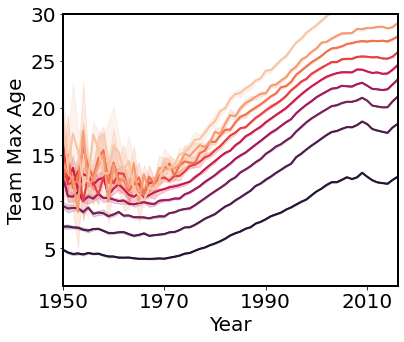

In [46]:
f, ax = plt.subplots(figsize=(6, 5))
for i in range(len(ylst3)):
    plt.plot(x, ylst3[i],linewidth=2,alpha = 1,c=colors2[i])
    sns.lineplot(dfp[dfp['TeamSizeG']==i+1],x='Year',y=c,color=colors2[i],n_boot=10)
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Max Age',fontsize = 20)
plt.xlim(1950,2016)
plt.ylim(1,30)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\d.svg",bbox_inches = 'tight')

In [47]:
x = range(1950 , 2017)
c2 = 'TeamMinAge'
ylst4 = [dfp[dfp['TeamSizeG']==G].groupby('Year')[c2].mean().reset_index()[c2].values for G in range(1,10)]

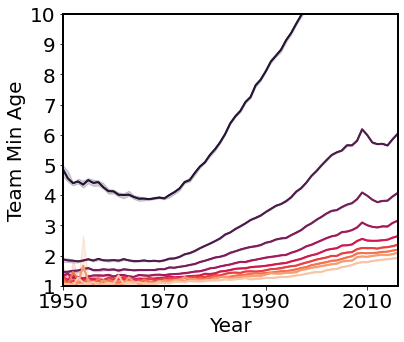

In [48]:
f, ax = plt.subplots(figsize=(6, 5))
for i in range(len(ylst4)):
    plt.plot(x, ylst4[i],linewidth=2,alpha = 1,c=colors2[i])
    sns.lineplot(dfp[dfp['TeamSizeG']==i+1],x='Year',y=c2,color=colors2[i],n_boot=10)
plt.yticks(fontsize=20,)
plt.xticks([1950,1970,1990,2010],fontsize=20,)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Team Min Age',fontsize = 20)
plt.ylim(1,10)
plt.xlim(1950,2016)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\e.svg",bbox_inches = 'tight')

In [49]:
d11 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c].mean())  
d21 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c2].mean())

In [50]:
d11.index = ['Team Size = 1','Team Size = 2','Team Size = 3','Team Size = 4','Team Size = 5','Team Size = 6','Team Size = 7','Team Size = 8','Team Size > 8']
d21.index = ['Team Size = 1','Team Size = 2','Team Size = 3','Team Size = 4','Team Size = 5','Team Size = 6','Team Size = 7','Team Size = 8','Team Size > 8']

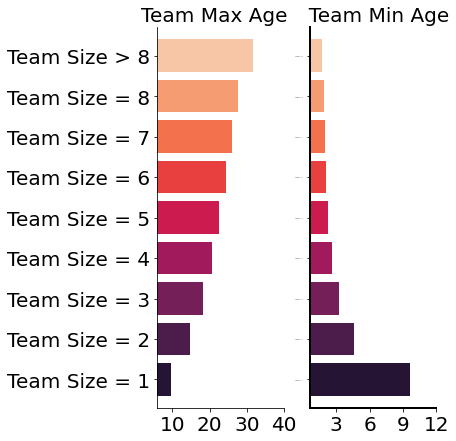

In [51]:
plt.subplots(1,2,figsize=(5,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0)
ax = plt.subplot(1,2, 1)
plt.barh( d11.index ,  width=d11.values.flatten(), capsize = 3, color = colors2)
plt.xlim(6,14)
plt.ylim(-.7,8.7)
plt.yticks(fontsize=20,)
plt.xticks([10,20,30,40],fontsize=20,)
plt.title('Team Max Age  ',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,2, 2)
plt.barh( d21.index ,  width=d21.values.flatten(), capsize = 3, color = colors2)
plt.xlim(0.6,1)
plt.ylim(-.7,8.7)
plt.yticks(fontsize=0,)
plt.xticks([3,6,9,12],fontsize=20,)
plt.title('  Team Min Age',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig(r"savepath\figs1\fig S2\f.svg",bbox_inches = 'tight')